In [5]:
import numpy as np
import pandas as pd
from lumfuncs import LF
import astropy.units as u
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM, z_at_value
import warnings
warnings.filterwarnings("ignore", category=UserWarning) # ignore warnings

cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

file = pd.read_csv('../DATA/ZFOURGE/CDFS/CDFS_MAIN.csv')
data = pd.DataFrame(file) # 30,911 galaxies
data = data[data['Use'] == 1] # 13,299 galaxies
data = data[data['FKs'] > 0] # 12,676 galaxies # drop rows if FKs is negative

### Zmax calculation

In [ ]:
z = data['zpk'] # redshift
flux = data['FKs'] # uJy
flux_limit = 27 # AB mangitude

distance = cosmo.luminosity_distance(z) # Mpc
distance *= 3.086 * 10 ** 22 # Mpc -> m

# flux = 25 - 2.5 * np.log10(flux) # uJy -> AB magnitude
# flux = 10 ** ((25 - flux) / 2.5) # AB magnitude -> uJy
flux *= 1e-32 # uJy -> W/m^2

flux_limit = 10 ** ((25 - flux_limit) / 2.5) # AB magnitude -> uJy
flux_limit *= 1e-32 # uJy -> W/m^2

luminosity = (4 * np.pi * (distance ** 2) * flux / (1 + z)) # Watts

z_max = ((4 * np.pi * (distance ** 2) * flux_limit) / luminosity) - 1
print(z_max)

luminosity = np.log10(luminosity) # Watts -> log10(Watts)
print(luminosity)

In [6]:
flux = data['FKs'] # uJy
flux_limit = 27 # AB mangitude
z = data['zpk'] # redshift
distance = cosmo.luminosity_distance(z) # Mpc

# flux = 25 - 2.5 * np.log10(flux) # uJy -> AB magnitude
flux *= 1e-32 # uJy -> W/m^2
flux_limit = 10 ** ((25 - flux_limit) / 5) # AB magnitude -> uJy
flux_limit *= 1e-32 # uJy -> W/m^2
distance *= 3.086 * 10 ** 22 # Mpc -> m

luminosity = 4 * np.pi * (distance ** 2) * flux # Watts 

limit_distance = np.sqrt(luminosity / (4 * np.pi * flux_limit)) # m
limit_distance *= 3.086 * 10 ** -22 # m -> Mpc

z_max = z_at_value(cosmo.luminosity_distance, limit_distance.values * u.Mpc) # redshift
print(z_max)

luminosity = np.log10(luminosity) # Watts -> log10(Watts)
print(luminosity)

[124.66184659  92.1736154   71.041281   ...   8.64964378  42.75666914
  40.21707112] redshift
5745     24.130510
5859     23.855232
5863     23.616262
5879     23.125753
5885     22.694179
           ...    
30860    21.725073
30872    22.867522
30905    21.609571
30907    23.145585
30909    23.088350
Length: 12676, dtype: float64


Text(0, 0.5, 'Log(Luminosity [W])')

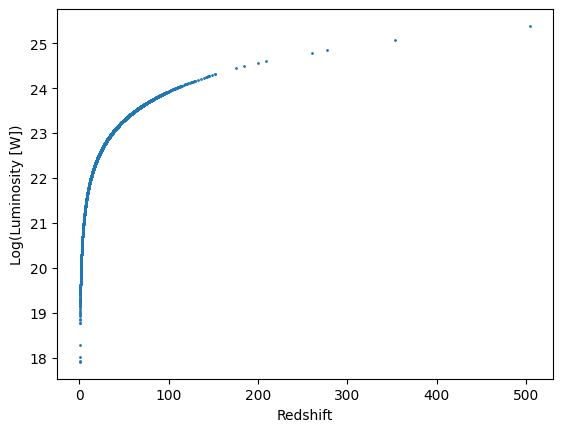

In [8]:
plt.scatter(z_max, luminosity, s=1)
plt.xlabel('Redshift')
plt.ylabel('Log(Luminosity [W])')
# plt.xlim(0, 8)
# plt.ylim(0)

Number of galaxies in each luminosity bin:
0 <= z < 1: [1, 0, 7, 19, 50, 111, 241, 451, 699, 847, 707, 444, 304, 235, 155, 70, 4, 1, 0, 0]. Total = 4346
1 <= z < 2: [0, 0, 0, 0, 1, 10, 15, 42, 118, 372, 812, 1020, 740, 515, 366, 182, 35, 1, 0, 0]. Total = 4229
2 <= z < 3: [0, 0, 0, 0, 0, 0, 1, 5, 11, 17, 98, 355, 695, 618, 385, 145, 21, 3, 2, 1]. Total = 2357
3 <= z < 4: [0, 0, 0, 0, 0, 0, 0, 0, 1, 14, 30, 53, 229, 488, 341, 142, 11, 4, 0, 0]. Total = 1313
4 <= z < 5: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 13, 37, 124, 130, 39, 2, 0, 0, 0]. Total = 348
5 <= z < 6: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 4, 10, 18, 4, 1, 0, 0, 0]. Total = 40




c:\Users\n10480129\OneDrive - Queensland University of Technology\Masters\Repositories\MPhil-Code\LUMFUNCS\lumfuncs.py:181: RuntimeWarning: overflow encountered in power
  return phi_star * 10 ** (0.4*(alpha+1)*(L-L_star)) * np.exp(-10.**(0.4*(L-L_star)))


0 <= z < 1 Schechter function fit:
L_star = 2.03e+01
phi_star = 1.30e-01
alpha = 3.74e-01


1 <= z < 2 Schechter function fit:
L_star = 1.65e+01
phi_star = -3.89e-06
alpha = -5.83e-01


2 <= z < 3 Schechter function fit:
L_star = 1.68e+01
phi_star = -1.09e-05
alpha = 5.01e-01


3 <= z < 4 Schechter function fit:
L_star = 1.79e+01
phi_star = -4.24e-08
alpha = -1.00e+00


4 <= z < 5 Schechter function fit:
L_star = 1.79e+01
phi_star = -6.12e-12
alpha = -1.00e+00


5 <= z < 6 Schechter function fit:
L_star = 1.79e+01
phi_star = -6.12e-12
alpha = -1.00e+00




C:\Users\n10480129\AppData\Local\Temp\ipykernel_22916\2709419729.py:12: RuntimeWarning: divide by zero encountered in log10
  ax.scatter(x, np.log10(y), label=f'{z_start} $\leq$ z < {z_end}')
C:\Users\n10480129\AppData\Local\Temp\ipykernel_22916\2709419729.py:13: RuntimeWarning: divide by zero encountered in log10
  ax.plot(x, np.log10(y_fit), label='Schechter fit', color='red', linestyle='--')
C:\Users\n10480129\AppData\Local\Temp\ipykernel_22916\2709419729.py:13: RuntimeWarning: invalid value encountered in log10
  ax.plot(x, np.log10(y_fit), label='Schechter fit', color='red', linestyle='--')


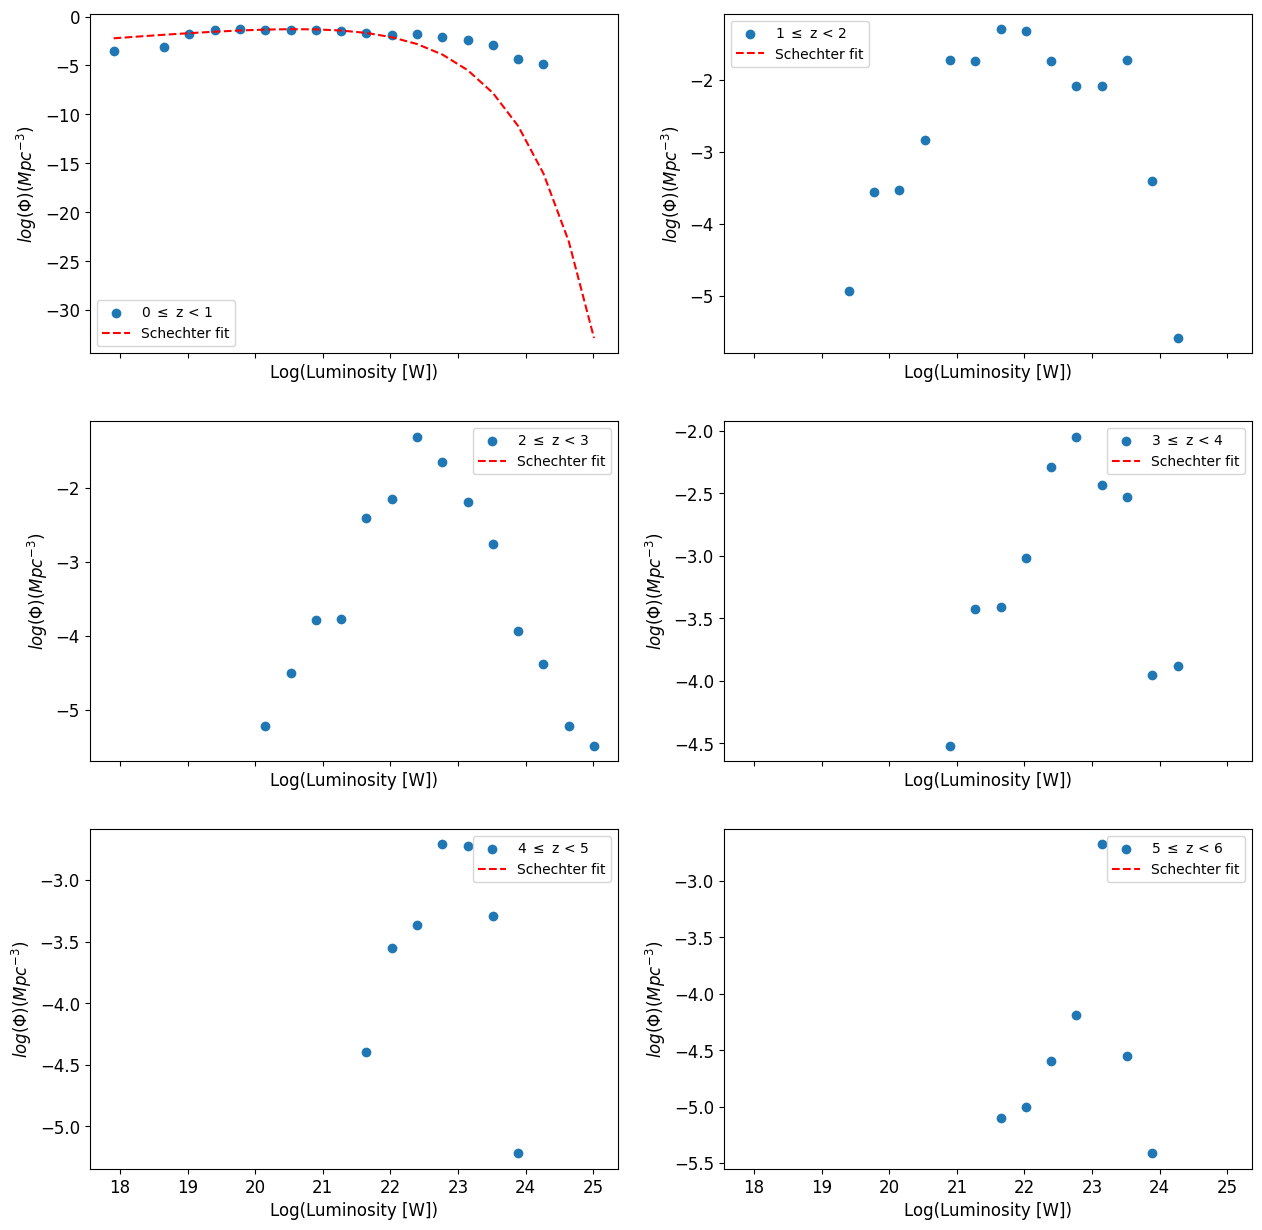

In [10]:
n_lum_bins = 20 # number of luminosity bins
z_bins = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6)] # redshift bins
survey_area = 0.11 # square degrees
lf = LF(cosmo, luminosity, n_lum_bins, z, z_max, z_bins, survey_area)

lf.counts()

data = lf.fit_schechter(func='luminosity', min_count=0, maxfev=1000, show=False)
fig, axes = plt.subplots(3, 2, figsize=(15, 15), sharex=True)
for ax, d in zip(axes.flatten(), data):
    x, y, y_fit, (z_start, z_end) = d
    ax.scatter(x, np.log10(y), label=f'{z_start} $\leq$ z < {z_end}')
    ax.plot(x, np.log10(y_fit), label='Schechter fit', color='red', linestyle='--')
    ax.set_xlabel('Log(Luminosity [W])', fontsize=12)
    ax.set_ylabel('$log(\Phi) (Mpc^{-3})$', fontsize=12)
    # ax.set_ylim(-8, -1)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.legend()
plt.show()